In [1]:
# general libraries
import pandas as pd
import numpy as np

# plot libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing data (aka feature engineering)
from sklearn.preprocessing import normalize

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

# model definition
from sklearn import svm as SVM
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

# ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# model metrics
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('./data/train.csv', header=0, sep=',', quotechar='"', index_col='Id')
test = pd.read_csv('./data/test.csv', header=0, sep=',', quotechar='"', index_col='Id')

# define the data
train_data = train.drop('Cover_Type', axis=1)
test_data = test

# define the labels
train_labels = train['Cover_Type']

In [35]:
# define the validation set from train data
s_train_data, s_dev_data, s_train_labels, s_dev_labels = train_test_split(train_data, train_labels, stratify=train_labels, test_size=0.2, random_state=7)

# verify the split is stratified among the different classes
print('train_data.shape: {}'.format(s_train_data.shape))
print('train_labels.shape: {}'.format(s_train_labels.shape))
print(train_labels.value_counts())
print('dev_data.shape: {}'.format(s_dev_data.shape))
print('dev_labels.shape:{}'.format(s_dev_labels.shape))
print(dev_labels.value_counts())

train_data.shape: (9676, 54)
train_labels.shape: (9676,)
7    1728
6    1728
5    1728
4    1728
3    1728
2    1728
1    1728
Name: Cover_Type, dtype: int64
dev_data.shape: (2420, 54)
dev_labels.shape:(2420,)
7    432
5    432
3    432
1    432
6    432
4    432
2    432
Name: Cover_Type, dtype: int64


| Name                               | Measurement     | Description                                               |
| ----------------------------------:| ---------------:| ---------------------------------------------------------:|
| Elevation                          | meters          | Height above sea level                                    |
| Aspect                             | degrees azimuth | Compass direction that a slope faces<br/>0: North, 90: East, 180: South, 270: West<br/>Potential influence on temperature and soil | 
| Slope                              | degrees         | Degree of incline of a surface<br/>In other words, maximum rate of change of elevation<br/>Has gradient and aspect as components                                                     | 
| Horizontal_Distance_To_Hydrology   | meters          | Horizontal Distance to the nearest surface water features | 
| Vertical_Distance_To_Hydrology     | meters          | Vertical Distance to the nearest surface water features   | 
| Horizontal_Distance_To_Roadways    | meters          | Horizontal distance to the nearest roadway                | 
| Horizontal_Distance_To_Fire_Points | meters          | Horizontal distance to the nearest wildfire ignition points | 
| Hillshade_9am                      | 0 (dark) to 255 (light) | Hillshade index at 9 AM, summer solstice | 
| Hillshade_Noon                     | 0 (dark) to 255 (light) | Hillshade index at 12 PM, summer solstice | 
| Hillshade_3pm                      | 0 (dark) to 255 (light) | Hillshade index at 3 PM, summer solstice | 
| Wilderness_Area (4 binary columns) | 0 (absent) or 1 (present) | Wilderness area designation<br/>1: Rawah, 2: Neota, 3: Comanche, 4: Cache la Poudre | 
| Soil_Type (40 binary columns)      | 0 (absent) or 1 (present) | Soil type designation |

# Feature Engineering

https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html

Use pipeline to perform the following feature engineering:

1. imputation of missing data -> hillsdale
2. normalization: rescaling values to range 0 and 1

No need to do: 

1. We do not need to apply one-hot encoding to Wilderness_Areas and Soil_Type because they are already aptly converted to their respective categorical features.
2. standardization: shift distribution to have mean zero and sd of one

In [39]:
train_feat_data = train_data.copy()

## Hillsdale

1. binary scale
2. normalize the data

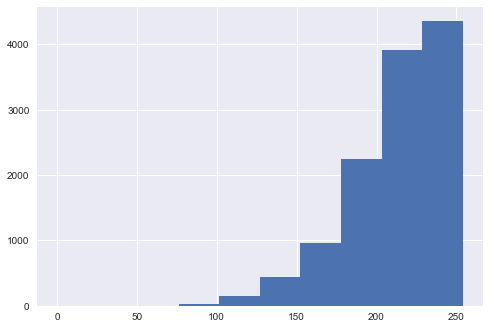

In [25]:
plt.hist(train_data['Hillshade_9am']);

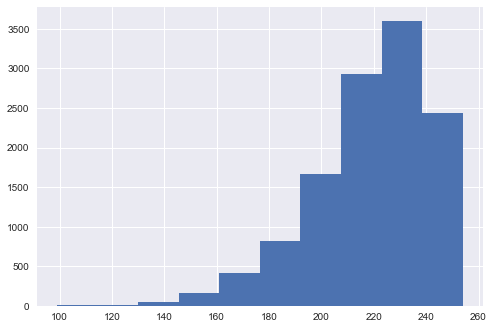

In [26]:
plt.hist(train_data['Hillshade_Noon']);

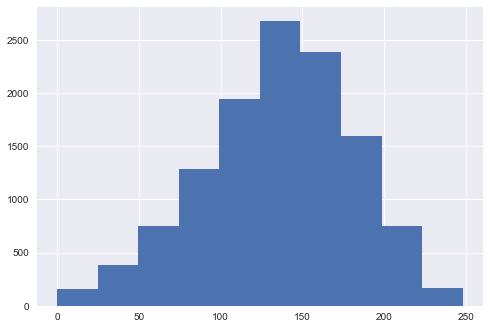

In [27]:
plt.hist(train_data['Hillshade_3pm']);

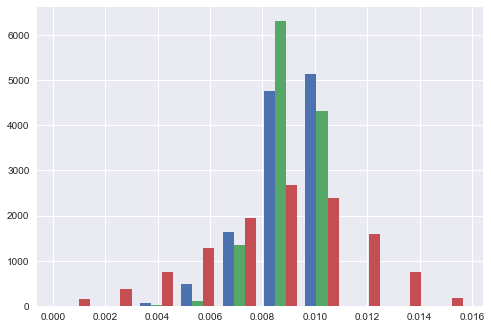

In [22]:
normalize_hillshade = normalize(train_data[['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']], axis=0)
plt.hist(normalize_hillshade);

In [40]:
train_feat_data['Hillshade_9am'] = normalize_hillshade[:, 0]
train_feat_data['Hillshade_Noon'] = normalize_hillshade[:, 1]
train_feat_data['Hillshade_3pm'] = normalize_hillshade[:, 2]

In [41]:
# define the validation set from featured engineering train data
f_train_data, f_dev_data, f_train_labels, f_dev_labels = train_test_split(train_feat_data, train_labels, stratify=train_labels, test_size=0.2, random_state=7)

# verify the split is stratified among the different classes
print('train_data.shape: {}'.format(f_train_data.shape))
print('train_labels.shape: {}'.format(f_train_labels.shape))
print(f_train_labels.value_counts())
print('dev_data.shape: {}'.format(f_dev_data.shape))
print('dev_labels.shape:{}'.format(f_dev_labels.shape))
print(f_dev_labels.value_counts())

train_data.shape: (9676, 54)
train_labels.shape: (9676,)
6    1383
3    1383
7    1382
5    1382
4    1382
2    1382
1    1382
Name: Cover_Type, dtype: int64
dev_data.shape: (2420, 54)
dev_labels.shape:(2420,)
7    346
5    346
1    346
4    346
2    346
3    345
6    345
Name: Cover_Type, dtype: int64


# Models

http://scikit-learn.org/stable/modules/multiclass.html

In [83]:
print('goal better than {}'.format(1/7))
pd.DataFrame({'Base Case': output_bc, 'Base Case + FE': output_bcfe}, 
             columns=['Base Case', 'Base Case + FE'],
             index=['Logistic Regression', 'Naive Bayes', 'KNN', 'SVM', 'Decision Trees', 'Neural Networks'])

goal better than 0.14285714285714285


,Base Case,Base Case + FE
Logistic Regression,0.658264,0.616529
Naive Bayes,0.591322,0.591322
KNN,0.789669,0.789669
SVM,0.148347,0.148347
Decision Trees,0.780992,0.779752
Neural Networks,0.415289,0.482231


* Base case: KNN, Decision Trees
* Base case + FE:
  * improve: NN
  * worsen: LR, Decision Trees

## Base case

In [54]:
output_bc = []

### Logistic Regression

In [55]:
lr = LogisticRegression()
lr.fit(s_train_data, s_train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
accuracies = []
for i in range(1, 10):
    pred_dev_labels = lr.predict(s_dev_data)
    accuracies.append(accuracy_score(s_dev_labels, pred_dev_labels))
mean_accuracies = sum(accuracies)/len(accuracies)
output_bc.append(mean_accuracies)
mean_accuracies

0.6582644628099174

### Naive Bayes

In [57]:
nb = GaussianNB()
nb.fit(s_train_data, s_train_labels)

GaussianNB(priors=None)

In [58]:
accuracies = []
for i in range(1, 10):
    pred_dev_labels = nb.predict(s_dev_data)
    accuracies.append(accuracy_score(s_dev_labels, pred_dev_labels))
mean_accuracies = sum(accuracies)/len(accuracies)
output_bc.append(mean_accuracies)
mean_accuracies

0.5913223140495868

### K-Nearest Neighbors

In [59]:
knn = KNeighborsClassifier()
knn.fit(s_train_data, s_train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [60]:
accuracies = []
for i in range(1, 10):
    pred_dev_labels = knn.predict(s_dev_data)
    accuracies.append(accuracy_score(s_dev_labels, pred_dev_labels))
mean_accuracies = sum(accuracies)/len(accuracies)
output_bc.append(mean_accuracies)
mean_accuracies

0.7896694214876032

### Support Vector Machine

In [61]:
svm = SVM.SVC() 
svm.fit(s_train_data, s_train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [62]:
accuracies = []
for i in range(1, 10):
    pred_dev_labels = svm.predict(s_dev_data)
    accuracies.append(accuracy_score(s_dev_labels, pred_dev_labels))
mean_accuracies = sum(accuracies)/len(accuracies)
output_bc.append(mean_accuracies)
mean_accuracies

0.14834710743801652

### Decision Trees

In [63]:
dt = DecisionTreeClassifier()
dt.fit(s_train_data, s_train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [64]:
accuracies = []
for i in range(1, 10):
    pred_dev_labels = dt.predict(s_dev_data)
    accuracies.append(accuracy_score(s_dev_labels, pred_dev_labels))
mean_accuracies = sum(accuracies)/len(accuracies)
output_bc.append(mean_accuracies)
mean_accuracies

0.78099173553719

### Neural Networks

In [65]:
mlp = MLPClassifier()
mlp.fit(s_train_data, s_train_labels)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [66]:
accuracies = []
for i in range(1, 10):
    pred_dev_labels = mlp.predict(s_dev_data)
    accuracies.append(accuracy_score(s_dev_labels, pred_dev_labels))
mean_accuracies = sum(accuracies)/len(accuracies)
output_bc.append(mean_accuracies)
mean_accuracies

0.41528925619834706

## Base case + feature engineering 

In [68]:
output_bcfe = []

### Logistic Regression

In [69]:
lr = LogisticRegression()
lr.fit(f_train_data, f_train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
accuracies = []
for i in range(1, 10):
    pred_dev_labels = lr.predict(f_dev_data)
    accuracies.append(accuracy_score(f_dev_labels, pred_dev_labels))
mean_accuracies = sum(accuracies)/len(accuracies)
output_bcfe.append(mean_accuracies)
mean_accuracies

0.6165289256198347

### Naive Bayes

In [71]:
nb = GaussianNB()
nb.fit(s_train_data, s_train_labels)

GaussianNB(priors=None)

In [72]:
accuracies = []
for i in range(1, 10):
    pred_dev_labels = nb.predict(s_dev_data)
    accuracies.append(accuracy_score(s_dev_labels, pred_dev_labels))
mean_accuracies = sum(accuracies)/len(accuracies)
output_bcfe.append(mean_accuracies)
mean_accuracies

0.5913223140495868

### K-Nearest Neighbors

In [73]:
knn = KNeighborsClassifier()
knn.fit(s_train_data, s_train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [74]:
accuracies = []
for i in range(1, 10):
    pred_dev_labels = knn.predict(s_dev_data)
    accuracies.append(accuracy_score(s_dev_labels, pred_dev_labels))
mean_accuracies = sum(accuracies)/len(accuracies)
output_bcfe.append(mean_accuracies)
mean_accuracies

0.7896694214876032

### Support Vector Machine

In [75]:
svm = SVM.SVC() 
svm.fit(s_train_data, s_train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [76]:
accuracies = []
for i in range(1, 10):
    pred_dev_labels = svm.predict(s_dev_data)
    accuracies.append(accuracy_score(s_dev_labels, pred_dev_labels))
mean_accuracies = sum(accuracies)/len(accuracies)
output_bcfe.append(mean_accuracies)
mean_accuracies

0.14834710743801652

### Decision Trees

In [77]:
dt = DecisionTreeClassifier()
dt.fit(s_train_data, s_train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [78]:
accuracies = []
for i in range(1, 10):
    pred_dev_labels = dt.predict(s_dev_data)
    accuracies.append(accuracy_score(s_dev_labels, pred_dev_labels))
mean_accuracies = sum(accuracies)/len(accuracies)
output_bcfe.append(mean_accuracies)
mean_accuracies

0.7797520661157025

### Neural Networks

In [79]:
mlp = MLPClassifier()
mlp.fit(s_train_data, s_train_labels)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [80]:
accuracies = []
for i in range(1, 10):
    pred_dev_labels = mlp.predict(s_dev_data)
    accuracies.append(accuracy_score(s_dev_labels, pred_dev_labels))
mean_accuracies = sum(accuracies)/len(accuracies)
output_bcfe.append(mean_accuracies)
mean_accuracies

0.48223140495867767

# Ensemble

5. Random Forest Classifier: 0.85

## Random Forest Classifier

In [18]:
# random forest classifier
rfc = RandomForestClassifier(n_estimators=100, bootstrap=True, oob_score=True)
rfc.fit(s_train_data, s_train_labels)

In [19]:
# listing important features
feature_imp = pd.Series(rfc.feature_importances_, index=s_train_data.columns).sort_values(ascending=False)
feature_imp

Elevation                             0.223938
Horizontal_Distance_To_Roadways       0.090755
Horizontal_Distance_To_Fire_Points    0.070323
Horizontal_Distance_To_Hydrology      0.061129
Vertical_Distance_To_Hydrology        0.054250
Hillshade_9am                         0.052386
Aspect                                0.050171
Hillshade_3pm                         0.048305
Hillshade_Noon                        0.045834
Wilderness_Area4                      0.040295
Slope                                 0.037330
Soil_Type10                           0.022140
Soil_Type38                           0.021733
Soil_Type39                           0.020034
Soil_Type3                            0.019868
Wilderness_Area3                      0.018959
Wilderness_Area1                      0.017509
Soil_Type4                            0.012765
Soil_Type40                           0.010758
Soil_Type30                           0.007383
Soil_Type17                           0.006751
Soil_Type2   

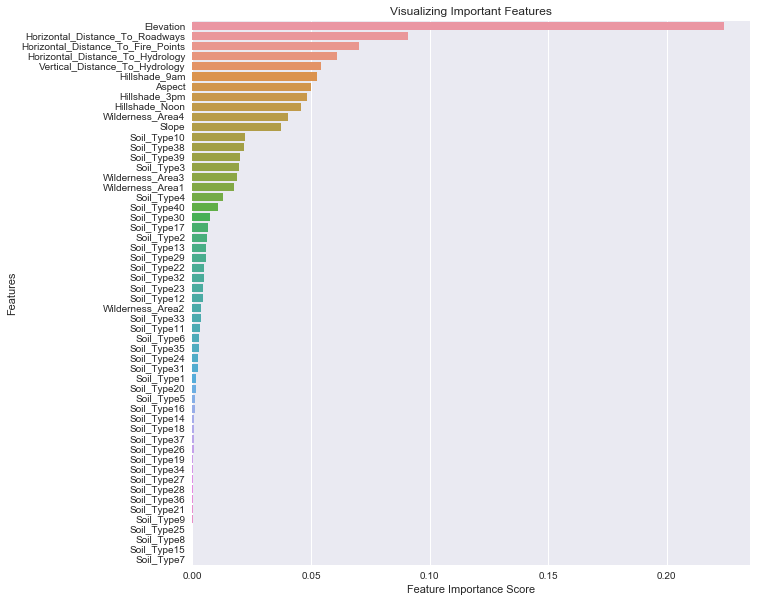

In [20]:
# plot important features
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x=feature_imp, y=feature_imp.index, ax=ax)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

In [21]:
accuracies = []
for i in range(1, 10):
    pred_dev_labels = rfc.predict(s_dev_data)
    accuracies.append(accuracy_score(s_dev_labels, pred_dev_labels))
sum(accuracies)/len(accuracies)

0.8581349206349207

In [ ]:
accuracies = []
for i in range(1, 10):
    pred_dev_labels = rfc.predict(f_dev_data)
    accuracies.append(accuracy_score(f_dev_labels, pred_dev_labels))
sum(accuracies)/len(accuracies)